In [1]:
import pandas as pd
import json
from sklearn import tree
from collections import defaultdict
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('result.csv')
data = data[(data['name'] != '') | data['is_constructor']]

In [3]:
data.columns

Index(['Unnamed: 0', 'name', 'normal_assignment', 'assignment',
       'state_var_normal_assignment', 'state_var_assign', 'if', 'loop',
       'var_definition', 'emit', 'guarantee', 'function_call', 'rhs_msgsender',
       'owner_is_msgsender', 'lhs_balance_assign', 'lhs_balance_owner_assign',
       'is_constructor', 'visibility', 'modifier_names', 'is_called',
       'is_return'],
      dtype='object')

In [4]:
data['total_stmt'] = data['assignment'] + data['if'] + data['loop'] + data['var_definition'] + data['emit'] + data['guarantee'] + data['function_call']

In [5]:
for column in ['normal_assignment', 'assignment', 'state_var_normal_assignment', 'state_var_assign',
               'if', 'loop', 'var_definition', 'emit', 'guarantee', 'function_call',
               'rhs_msgsender', 'owner_is_msgsender', 'lhs_balance_assign', 'lhs_balance_owner_assign']:
    data[column] /= data['total_stmt']
data.dropna(inplace=True)
data.reset_index(inplace=True)

In [6]:
data['is_only_owner'] = data['modifier_names'].apply(lambda x: any('owner' in st.lower() for st in eval(x)))

In [7]:
vis_mapping = {
    'default': 1,
    'public': 1,
    'internal': 2,
    'external': 3,
    'private': 3,
}
data['visibility'] = data['visibility'].apply(lambda x: vis_mapping[x])

In [8]:
train_x = data[[col for col in set(data.columns) - {'index', 'Unnamed: 0', 'is_constructor', 'name', 'total_stmt', 'modifier_names'}]].astype(float)
train_y = data['is_constructor']

In [9]:
train_x[train_y]

,assignment,var_definition,if,rhs_msgsender,is_only_owner,is_return,lhs_balance_assign,state_var_normal_assignment,owner_is_msgsender,normal_assignment,function_call,lhs_balance_owner_assign,visibility,guarantee,state_var_assign,loop,is_called,emit
0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.0,0.0,1.000000,0.0,0.0,0.000000
12,1.000000,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.0,1.000000,0.0,0.000000,1.0,0.0,1.000000,0.0,0.0,0.000000
15,0.833333,0.0,0.0,0.0,0.0,0.0,0.166667,0.833333,0.0,0.833333,0.0,0.166667,1.0,0.0,0.833333,0.0,0.0,0.166667
29,1.000000,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.0,1.000000,0.0,0.000000,1.0,0.0,1.000000,0.0,0.0,0.000000
33,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.000000,1.0,0.0,1.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208227,1.000000,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,1.0,1.000000,0.0,0.000000,1.0,0.0,1.000000,0.0,0.0,0.000000
208267,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.0,0.500000,0.0,0.000000,1.0,0.5,0.500000,0.0,0.0,0.000000
208283,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.0,0.500000,0.0,0.000000,1.0,0.5,0.500000,0.0,0.0,0.000000
208293,0.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.500000,0.0,0.500000,0.0,0.000000,1.0,0.5,0.500000,0.0,0.0,0.000000


In [10]:
def draw(aspect, train_x=train_x):    
    f, a = plt.subplots(1, 2)
    f.suptitle(aspect, fontsize=16)
            
    a[0].set_title('Non-constructor')
    a[0].set_ylim(0, 1)
    train_x[~train_y][aspect].hist(weights=np.ones(len(train_x[~train_y][aspect])) / len(train_x[~train_y][aspect]), ax=a[0])
        
    a[1].set_title('constructor')
    a[1].set_ylim(0, 1)
    train_x[train_y][aspect].hist(weights=np.ones(len(train_x[train_y][aspect])) / len(train_x[train_y][aspect]), ax=a[1])
    
    plt.show()

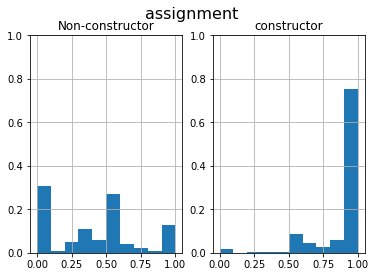

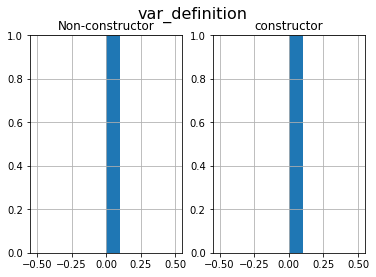

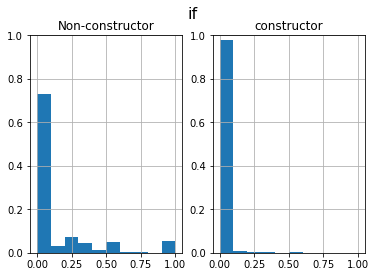

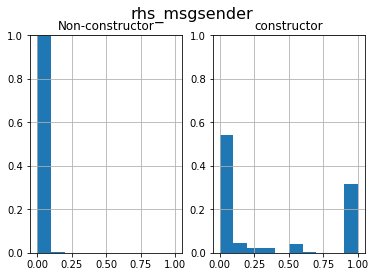

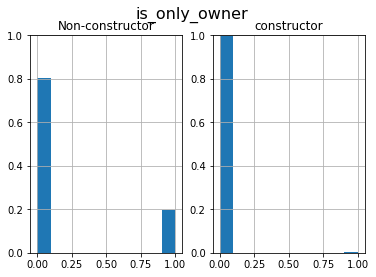

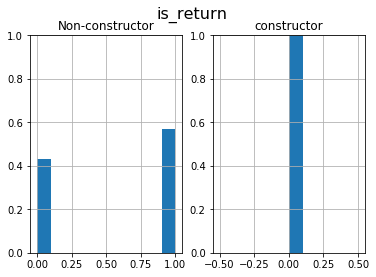

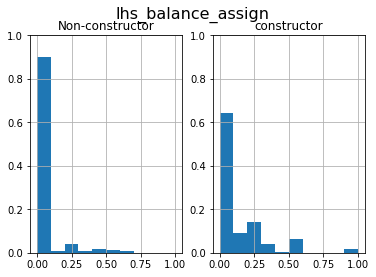

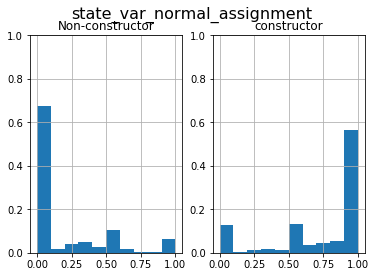

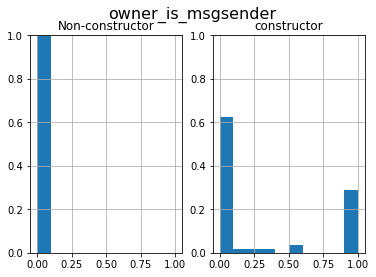

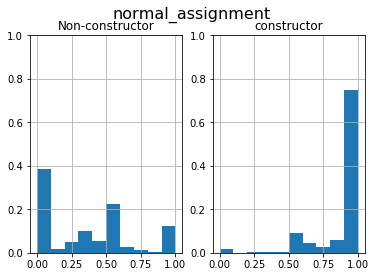

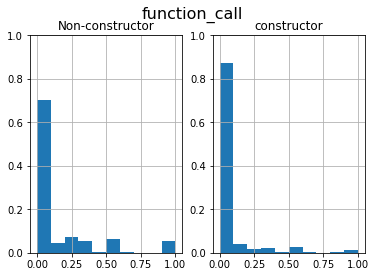

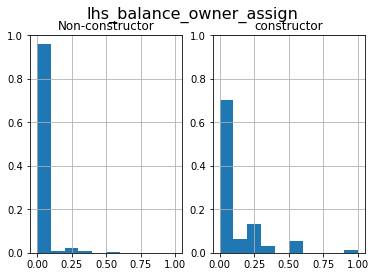

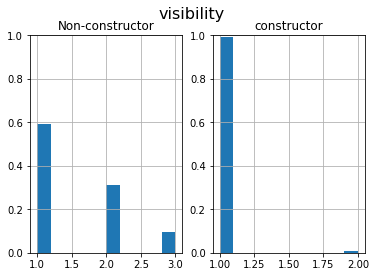

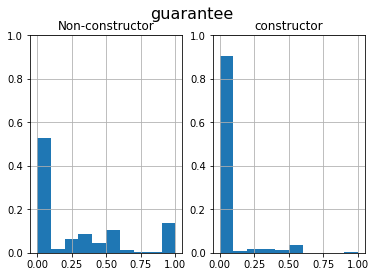

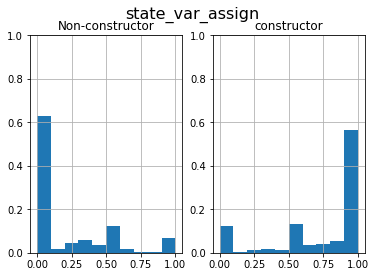

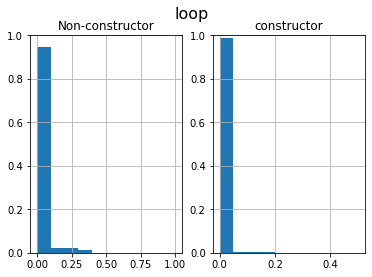

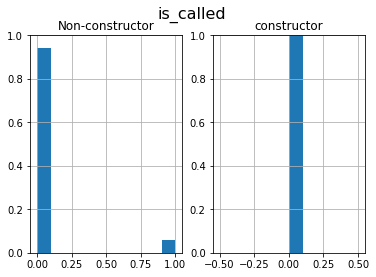

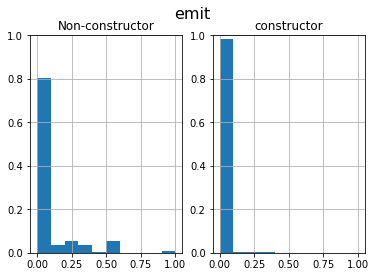

In [11]:
for column in train_x.columns:
    draw(column)

In [12]:
clt = tree.DecisionTreeClassifier(criterion='entropy')
clt.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_pred = clt.predict(train_x)
accuracy = accuracy_score(train_y, y_pred)
precision = precision_score(train_y, y_pred)
recall = recall_score(train_y, y_pred, average='binary')
f1score = f1_score(train_y, y_pred, average='binary')
print('accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f1score: {}'.format(f1score))

accuracy: 0.9869796530142175
precision: 0.9643778527485612
recall: 0.8046195877142147
f1score: 0.8772848309789232
